 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Abstraction
- Inheritance
- Polymorphism


## 1 ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

In [39]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'


In [40]:
class Video:
    
    def __init__(self):
        self.name = None
        self.length = timedelta() 
        self.link = generic_image
        
    def play(self):
        print(f"now playing {self.name}")
        display(Image(self.link))
    def pause(self):
        print("video paused")
        
    def __repr__(self):
        return f"{self.name} is {self.length.seconds} seconds long. "
    
        
    

## 2 ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user.
<br><br>


In [41]:
class Episode(Video):
    def __init__(self,data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.name = data['name']
        self.length = timedelta(minutes = data['runtime'])
        if data['image']:
            self.link = data['image']['medium']
        else:
            self.link = generic_image

## 3 INHERITENCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [42]:

class Series:
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.genres = []
        self.episodes = []
        
    def get_info(self):
        data = None
        while not data:
            search = input('What is the name of this series?')
            r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={search}')
            if r.status_code == 200:
                data = r.json()
            else:
                print(f"Series error: status code {r.status_code}")
                
        self.id = data['id']
        self.name = data['name']
        self.summary = data['summary']
        self.genres = [genre for genre in data['genres']]
        self.network = data['network'] or data['webChannel']['name']
        
        #API call for Episodes
        r = requests.get(f'https://api.tvmaze.com/shows/{self.id}/episodes')
        if r.status_code == 200:
            episodes = r.json() 
        else:
            print(f"episode error: status code {r.status_code}")
            return
        self.seasons = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes]
        
    def play(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input('Are you still watching? y/N')
                if watching.lower() not in ('yes','y'):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
            
    def __len__(self):
        return len(self.episodes)
    def __repr__(self):
        return self.name

In [8]:
first_show = Series()
first_show.get_info()

What is the name of this series?outlander


In [9]:
len(first_show)

75

## 4 POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


In [37]:
# first_show.play()

In [43]:
show_2 = Series()
show_2.get_info()

What is the name of this series?simpsons


In [38]:
# show_2.watch()

In [61]:
class Theater:
    def __init__(self):
        self.users = []
        self.watchlist = []
        self.current_user = None
        
    def add_to_watchlist(self):
        show = Series()
        show.get_info()
        self.watchlist.append(show)
        print(f"{show.name} has been added to your watchlist")
        
    def add_user(self, name = ''):
        if not name:
            name = input('What is the name of your new user?')
        self.users.append(name)
        
    def choose_user(self):
        while True:
                print('Users')
                for user in self.users:
                    print(user)
                current = input('Choose a user')
                if current in self.users:
                    self.current_user = current
                    print(f"{self.current_user} is now watching.")
                    break
                else:
                    print("current is not a user")
                    
    def choose_from_watchlist(self):
        for series in self.watchlist:
            print(f"\n\n{series} | Episodes: {len(series)}")
            print("\nSummary: \n",str(series.summary))\
            
        watch = input('What would you like to watch?')
        
        for series in self.watchlist:
            if series.name.lower() == watch.lower():
                series.play()
        response = input(f"{watch} is not in your watch list. Would you like to add it? y/N")
        if response in ('y','yes'):
            self.add_to_watchlist()
            self.watchlist[-1].play()
        
            
                
    def run(self):
        """
            Function allowing users choose series and play episodes.
        """
        
        if self.users:
            self.choose_user()   
        else:
            name = input('Create a profile: ')
            self.add_user(name)
            
            self.current_user = name
        print(self.current_user)
        print("""
            What would you like to do:
            
            Search - Search for shows
            Watch  - pick something from your watchlist
            Add    - add new user
            Quit   - close the app
            
        """)
    
        while True:
            response = input("What would you like to do? (search, watch, add, quit)")
            
            if response.lower() == 'search':
                self.add_to_watchlist()
            elif response.lower() == 'watch':
                self.choose_from_watchlist()
            elif response.lower() == 'add':
                self.add_user()
                self.choose_user()
            elif response.lower() == 'quit':
                print('Thanks for watching')
                break
            else:
                print("Incorrect input... try again")

Create a profile: panda
panda

            What would you like to do:
            
            Search - Search for shows
            Watch  - pick something from your watchlist
            Add    - add new user
            Quit   - close the app
            
        
What would you like to do? (search, watch, add, quit)search
What is the name of this series?in the dark
In the Dark has been added to your watchlist
What would you like to do? (search, watch, add, quit)watch


In the Dark | Episodes: 39

Summary: 
 <p>Murphy is a hard-living, hard-drinking, disaffected twenty-something with a penchant for cigarettes and casual sex. She's also blind. Murphy lives with her supportive best friend, Jess, and - more reluctantly - her trusty guide dog, Pretzel, whose presence she resents. Murphy's closest friend is a sweet teenager named Tyson, who she befriends after he saved her from a violent mugging. Her life comes crashing down when she stumbles upon what she's sure is the lifeless body of 

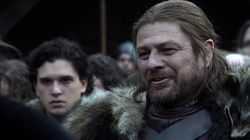

now playing The Kingsroad


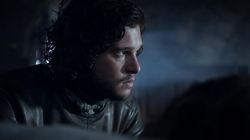

now playing Lord Snow


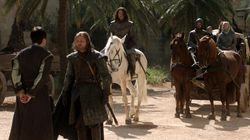

In [ ]:
codeflix = Theater()
codeflix.run()

##  Exercise 1:
Discuss what other classes we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads...